In [1]:
import os.path, sys
import Bio   

import numpy as np
import pandas as pd
from scipy import linalg
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance

from joblib import Parallel, delayed
from pathlib import Path
import timeit

import matplotlib.pyplot as plt

print('Done with initial import')


create_new = False
printing = True
removing_cols = True
remove_diagonals = False

pdb_path = "/pdb/pdb/"
data_path = Path('/data/cresswellclayec/Pfam-A.full')

# Define data directories
DCA_ER_dir = '/data/cresswellclayec/DCA_ER' # Set DCA_ER directory
biowulf_dir = '%s/biowulf_full' % DCA_ER_dir


out_dir = '%s/protein_data/di/' % biowulf_dir
out_metric_dir = '%s/protein_data/metrics/' % biowulf_dir

processed_data_dir = "%s/protein_data/data_processing_output/" % biowulf_dir
pdb_dir = '%s/protein_data/pdb_data/' % biowulf_dir

pdb_id = "3bcc"
pdb_id = "1r1o"
prody_df = pd.read_csv('%s/%s_pdb_df.csv' % (pdb_dir, pdb_id))
pdb_file = "%spdb%s.ent" % (pdb_dir,pdb_id)


pdb2msa_row = prody_df.iloc[0]
pfam_id = pdb2msa_row['Pfam']
pdb_chain = pdb2msa_row['Chain']
print(pdb2msa_row)


from data_processing import data_processing_pdb2msa

# generate alignment specifically for contact map plot.
dp_result =  data_processing_pdb2msa(data_path, pdb2msa_row, gap_seqs=0.2, gap_cols=0.2, prob_low=0.004,
                       conserved_cols=0.8, printing=True, out_dir=processed_data_dir, pdb_dir=pdb_dir, letter_format=False,
                       remove_cols=True, create_new=True)

import pickle
# generated in data_processing_pdb2msa as of 6/5/2022
with open('%s/%s_%s_alignment.pickle' % (processed_data_dir, pdb_id, pfam_id), 'rb') as f:
    alignment = pickle.load(f)
f.close()



Done with initial import
Unnamed: 0                                                           0
PDB ID                                                            1r1o
Chain                                                                A
Polypeptide Index                                                    0
Pfam                                                           PF00491
accession                                                   PF00491.24
class                                                           Domain
id                                                            Arginase
type                                                            Pfam-A
PDB Sequence         KPIEIIGAPFSKGQPRGGVEKGPAALRKAGLVEKLKETEYNVRDHG...
ali_end                                                            297
ali_start                                                            3
bitscore                                                        258.84
end                                                 

IE--IIGA-PFSK---GQP-RG-GVEK--GPA-AL-RK-AGLV--EKLKET-EY-NVR-D-HGDLAFV-DV-P-NDS-PF-QIVKNPR----SVG--KAN-EQLAAVV--A-ET-------Q---KNGTISV----VLGGDHSM-AIGSISGH-AR-V--HP-D-LC-VIWV-DAHT-DINTPLT----TS-SGNL-HGQ-PVAFLLKE---LKGKFPDVP-GFSWV----T------PC-ISAKD---IVYI-GL-RDV--DPGEHYIIKT--L----GIK-YFSMT--EVDKLGI---G--KVM-EETFS--YLLGRKK-RP---IHLSF-DV-DGLDPVFTP--AT-G--TPVVG-GLSYREGLYITEEIYKTGLL--SG-LDI-MEVNPT-LGKTP-E-EVTRTVN-T-A--VALT-----LS-
    |||  |      ||  |  ||    ||  |  |  ||    |||    |  |   | | ||    |  | |   |  |  ||      |    | | ||    |  | |        |   | |        |||||||  |||  |   |  |  |  | |  |||  |||  |    |     || |||  ||  |    |     | |       |        |      |  |  |    || | |  |    ||||        |    ||| |   |  |     |   |  ||  |||    | |   | |    ||||  |  ||||    |  |  |  || |  |     |  ||   |       |  |   ||     |     | |    |  | |  |        |  
--MSIIG-VP---MDLGQ-SR-RGV--DMGP-SA-MR-YAG--AIEKL---QE-LN--IDTH-DL---GD-IPIN--RP-DQ--KN--IDNDS--NLK-NLEQ----VIEANE-KLAEMVDQEIEK-G----QFPLVLGGDH

IE-IIGAPFSKGQPR-GGVEK-GPAA--LRKAGLV-EKLKET-EYN-VR-DH-GDLA-FV-DVPN-DSPFQI-VKNPRSVGKANEQLAA-VVAETQ-K-NG-TISV-VLGGDHSM-AIGSIS-GHAR-VHPDLCVIWVDAHTDINTPLTTS-SGNLHGQPVA-FLLKELKGKF---PDVPGF-SWVTPCISAKDIVYIGLRDVDPGEHYII-KTLGIKYFSMT-EVDKLGIGKVMEETF-SYLLGRKKRPIHLSFDVDGLDPVF-TPATGTPVV-GGLSYREGLY-ITEEIYKTGLLSGLDIMEVNPTLGKTPEEVTRTVNTAVALTLS
|  |||||||||||  ||||  ||    ||||||  |||||  ||  |  |  |||  |  |||  |||||  |||||||||||||| | ||||   | || | |  |||||||  |||||  |||  ||||||||||||||||||||||  |||||||||  ||||||  |    |||||  |||||||||||||||||||||||||| | ||||||||||  ||||||||||||||  |||||||||||||||||||||| | ||||||| | |||||||||  ||||||||||||||||||||      |               |
I-GIIGAPFSKGQP-LGGVE-EGP--TVLRKAGL-LEKLKE-QEY-DV-KD-YGDL-IF-ADVP-SDSPFQ-TVKNPRSVGKANEQL-ASVVAE--VKKNGRT-S-LVLGGDHS-LAIGSI-FGHA-KVHPDLCVIWVDAHTDINTPLTT-PSGNLHGQPV-SFLLKEL--K-SQIPDVPG-LSWVTPCISAKDIVYIGLRDVDPGEHY-ILKTLGIKYFSM-SEVDKLGIGKVMEET-LSYLLGRKKRPIHLSFDVDGLDP-FFTPATGTP-VPGGLSYREGL-HITEEIYKTGLLSGLDIMEVN------P---------------S
  Score=24

best match is sequence 5395 with hamming distance of 295 (length 300)
0 []
PDB index map:  274 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 

found 297 duplicates! (Removing...)
After removing bad sequences, tpdb is now  5334
2071
After removing bad sequences, tpdb is now  4504

After removing bad sequences...
tpdb (s_ipdb) is :  4504
(11526, 274)
found bad columns := [ 33  34  35  36  37  43  53  59  65  66  67  68 126 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 212 214 215 259]
found conserved columns (80% repetition):
 [  4   6  15  20  24  33  49  51  53  65  66  67  68  90  91  93 116 117
 118 120 146 147 148 149 170 172 212 224 226 229 234 243 266 269 272]
We remove conserved and bad columns with, at the following indices (len 57):
 [259   4   6 266 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155  20  24  33  34  35  36  37 170  43 172  49  51  53  59  65  66
  67  68 269  15 212 214 215 272  90  91  93 224 226 229 234 243 116 117
 118 120 126]
Removed Columns...
s now has shape:  (11526, 217)
s_index (length=217) = 
 [  0   1   2   3   5   7   8   9  10  11  12  13  14  16  17  18

In [2]:

if removing_cols:
    s0 = np.load("%s/%s_%s_preproc_msa.npy" % (processed_data_dir, pfam_id, pdb_id))
    s_index = np.load("%s/%s_%s_preproc_sindex.npy" % (processed_data_dir, pfam_id, pdb_id))
    #pdb_s_index = np.load("%s/%s_%s_preproc_pdb_sindex.npy" % (processed_data_dir, pfam_id, pdb_id))
    removed_cols = np.load("%s/%s_%s_removed_cols.npy" % (processed_data_dir, pfam_id, pdb_id))
    ref_seq = np.load("%s/%s_%s_preproc_refseq.npy" % (processed_data_dir, pfam_id, pdb_id))
else:
    s0 = np.load("%s/%s_%s_allCols_msa.npy" % (processed_data_dir, pfam_id, pdb_id))
    s_index = np.load("%s/%s_%s_allCols_sindex.npy" % (processed_data_dir, pfam_id, pdb_id))
    #pdb_s_index = np.load("%s/%s_%s_allCols_pdb_sindex.npy" % (processed_data_dir, pfam_id, pdb_id)) 
    removed_cols = np.load("%s/%s_%s_removed_cols.npy" % (processed_data_dir, pfam_id, pdb_id))
    ref_seq = np.load("%s/%s_%s_allCols_refseq.npy" % (processed_data_dir, pfam_id, pdb_id))
pdb_s_index = s_index # will need to rerun simulations with corrected data_processing (corrected on 3/15/22) to get pdb_s_index. not actually needed in contact mapping......

pfam_dimensions_file = "%s%s_%s_pfam_dimensions.npy" % (processed_data_dir, pdb_id, pfam_id)
pfam_dimensions = np.load(pfam_dimensions_file)
print(pdb_id)
print(pfam_dimensions)

[n_col, n_seq, m_eff, ct_ER, ct_PMF, ct_PLM] = pfam_dimensions
print('Number of Columns: ', n_col)
print('Number of sequences: ', n_seq)
print('Number of effective sequences: ', m_eff)
print('ER, PMF, PLM optimal distance: ', ct_ER, ct_PMF, ct_PLM)

ct_file = "%s%s_%s_ct.npy" % (pdb_dir, pdb_id, pfam_id)
ct = np.load(ct_file)


# load DI data
ER_di = np.load("%s/%s_%s_ER_di.npy" % (out_dir, pdb_id, pfam_id))
PMF_di_data = np.load("%s/%s_%s_PMF_di.npy" % (out_dir, pdb_id, pfam_id),allow_pickle=True)
PLM_di_data = np.load("%s/%s_%s_PLM_di.npy" % (out_dir, pdb_id, pfam_id),allow_pickle=True)


# transform pydca DI dictionary to DI matrices.
PLM_di = np.zeros(ER_di.shape)
PLM_di_dict = {}
for score_set in PLM_di_data:
    PLM_di_dict[(score_set[0][0], score_set[0][1])] = score_set[1]
for i, index_i in enumerate(s_index):
    for j, index_j in enumerate(s_index):
        if i==j:
            PLM_di[i,j] = 1.
            continue
        try:
            PLM_di[i,j] = PLM_di_dict[(index_i, index_j)]
            PLM_di[j,i] = PLM_di_dict[(index_i, index_j)] # symetric
        except(KeyError):
            continue

PMF_di = np.zeros(ER_di.shape)
PMF_di_dict = {}
for score_set in PMF_di_data:
    PMF_di_dict[(score_set[0][0], score_set[0][1])] = score_set[1]
for i, index_i in enumerate(s_index):
    for j, index_j in enumerate(s_index):
        if i==j:
            PMF_di[i,j] = 1.
            continue
        try:
            PMF_di[i,j] = PMF_di_dict[(index_i, index_j)]
            PMF_di[j,i] = PMF_di_dict[(index_i, index_j)] # symetric
        except(KeyError):
            continue


1r1o
[2.17000000e+02 1.15260000e+04 5.39307400e+03 4.35294118e+00
 4.00000000e+00 4.00000000e+00]
Number of Columns:  217.0
Number of sequences:  11526.0
Number of effective sequences:  5393.073995989328
ER, PMF, PLM optimal distance:  4.352941176470588 4.0 4.0


# ER

In [50]:
file_end = "_ld5.npy"
file_end = ".npy"
fp_file = "%s%s_%s_ER_fp%s" % (out_metric_dir, pdb_id, pfam_id, file_end)
tp_file = "%s%s_%s_ER_tp%s" % (out_metric_dir, pdb_id, pfam_id, file_end)
er_fp = np.load(fp_file)
er_tp = np.load(tp_file)

pairs_matrix = np.empty((len(s_index),len(s_index)), dtype=object)                                                                                                   

for i, ii in enumerate(s_index):  
    for j, jj in enumerate(s_index):
        pairs_matrix[i,j] =(i,j)
print(pairs_matrix)
print(pairs_matrix.shape)

# Set contact distance
ct_dist = 10
ct1 = ct.copy()
ct_pos = ct < ct_dist


ct1[ct_pos] = 1
ct1[~ct_pos] = 0
mask = np.triu(np.ones(ER_di.shape[0], dtype=bool), k=1)
# argsort sorts from low to high. [::-1] reverses 
order = ER_di[mask].argsort()[::-1]

ld_thresh = 5.
linear_distance = np.zeros((len(s_index),len(s_index)))                                                                                                   
for i, ii in enumerate(s_index):                                                                                                                          
    for j, jj in enumerate(s_index):                                                                                                                      
        linear_distance[i,j] = abs(ii - jj)   


ld = linear_distance >= ld_thresh                                                                                                                         
ld_flat = ld[mask][order]          

ER_di_flat = ER_di[mask][order]
ct_flat = ct1[mask][order]
dist_flat = ct[mask][order]
pairs_flat = pairs_matrix[mask][order]

plm_mask = np.triu(np.ones(PLM_di.shape[0], dtype=bool), k=1)
# argsort sorts from low to high. [::-1] reverses 
plm_order = PLM_di[mask].argsort()[::-1]

PLM_di_flat = PLM_di[plm_mask][plm_order]
PLM_ct_flat = ct1[plm_mask][plm_order]
PLM_dist_flat = ct[plm_mask][plm_order]
PLM_pairs_flat = pairs_matrix[plm_mask][plm_order]

mf_mask = np.triu(np.ones(PMF_di.shape[0], dtype=bool), k=1)
# argsort sorts from low to high. [::-1] reverses 
mf_order = PMF_di[mask].argsort()[::-1]

MF_di_flat = PMF_di[mf_mask][mf_order]
MF_ct_flat = ct1[mf_mask][mf_order]
MF_dist_flat = ct[mf_mask][mf_order]
MF_pairs_flat = pairs_matrix[mf_mask][mf_order]

[[(0, 0) (0, 1) (0, 2) ... (0, 214) (0, 215) (0, 216)]
 [(1, 0) (1, 1) (1, 2) ... (1, 214) (1, 215) (1, 216)]
 [(2, 0) (2, 1) (2, 2) ... (2, 214) (2, 215) (2, 216)]
 ...
 [(214, 0) (214, 1) (214, 2) ... (214, 214) (214, 215) (214, 216)]
 [(215, 0) (215, 1) (215, 2) ... (215, 214) (215, 215) (215, 216)]
 [(216, 0) (216, 1) (216, 2) ... (216, 214) (216, 215) (216, 216)]]
(217, 217)


# PLM

In [4]:
fp_file = "%s%s_%s_PLM_fp%s" % (out_metric_dir, pdb_id, pfam_id, file_end)
tp_file = "%s%s_%s_PLM_tp%s" % (out_metric_dir, pdb_id, pfam_id, file_end)
plm_fp = np.load(fp_file)
plm_tp = np.load(tp_file)

# Plot DI method comparison (plot functions) 

In [5]:
def plot_di_vs_ct(ax, ct_flat, dist_flat, dis_flat, ld_flat, labels):
    colors = 'brg'
    for ii, di_flat in enumerate(dis_flat):
        fmethod = True
        for i, contact in enumerate(ct_flat):
            if fmethod:
                ax.scatter(dist_flat[i], di_flat[i], marker='.',  c=colors[ii], label=labels[ii])
                fmethod=False
            else:
                ax.scatter(dist_flat[i], di_flat[i], marker='.',  c=colors[ii])

    ax.set_xlabel('Distance ($\AA$)')
    ax.set_ylabel('DI')
    return ax

In [6]:
def plot_di_compare_methods(ax, ct_flat, di1_flat, di2_flat, ld_flat, labels):
    ec = 'b'
    f1 = True
    f2 = True
    f3 = True
    for j in range(len(ct_flat), -1, -1):
        i = j-1
        contact = ct_flat[i]
        if not ld_flat[i]:
            if f1:
                ax.scatter(di1_flat[i], di2_flat[i], marker='x',  c='k', alpha=.2, label='to close')
                f1 = False
            else:
                ax.scatter(di1_flat[i], di2_flat[i],  marker='x',  c='k', alpha=.2)
    
        elif contact==1.:
            if f2:
                ax.scatter(di1_flat[i], di2_flat[i], marker='o', facecolors='none', edgecolors='g', label='contact')
                f2=False
            else:
                ax.scatter(di1_flat[i], di2_flat[i],  marker='o', facecolors='none', edgecolors='g')
        else:
            if f3:
                ax.scatter(di1_flat[i], di2_flat[i], marker='_', c='r', label='no contact')
                f3 = False
            else:
                ax.scatter(di1_flat[i], di2_flat[i], marker='_', c='r')
    ax.set_xlabel('%s DI' % labels[0])
    ax.set_ylabel('%s DI' % labels[1])
    return ax


In [7]:
def plot_contact_map(ax, ct, DI, s_index, ld_flat, labels):
    ec = 'b'
    f1 = True
    f2 = True
    f3 = True
    for j, contact in enumerate(ct_flat):
        if not ld_flat[i]:
            if f1:
                ax.scatter(di1_flat[i], di2_flat[i], marker='x',  c='k', alpha=.2, label='to close')
                f1 = False
            else:
                ax.scatter(di1_flat[i], di2_flat[i],  marker='x',  c='k', alpha=.2)
    
        elif contact==1.:
            if f2:
                ax.scatter(di1_flat[i], di2_flat[i], marker='o', facecolors='none', edgecolors='g', label='contact')
                f2=False
            else:
                ax.scatter(di1_flat[i], di2_flat[i],  marker='o', facecolors='none', edgecolors='g')
        else:
            if f3:
                ax.scatter(di1_flat[i], di2_flat[i], marker='_', c='r', label='no contact')
                f3 = False
            else:
                ax.scatter(di1_flat[i], di2_flat[i], marker='_', c='r')
    ax.set_xlabel('%s DI' % labels[0])
    ax.set_ylabel('%s DI' % labels[1])
    return ax


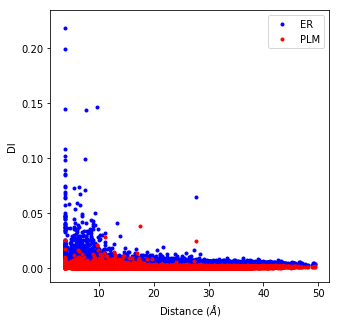

In [8]:
labels = ['ER', 'PLM']
flat_dis =  [ER_di_flat, PLM_di_flat]

plt.figure(figsize=(5,5))
ax = plt.subplot2grid((1,1),(0,0))
ax = plot_di_vs_ct(ax, ct_flat, dist_flat, flat_dis, ld_flat, labels)
ax.legend()
plt.show()



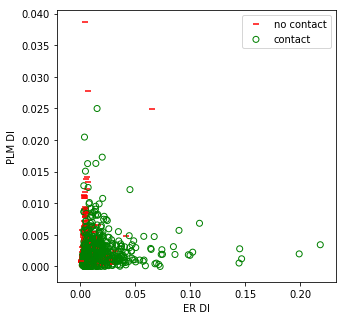

In [9]:
plt.figure(figsize=(5,5))
ax = plt.subplot2grid((1,1),(0,0))
ax = plot_di_compare_methods(ax, ct_flat, flat_dis[0], flat_dis[1], ld_flat, labels)
ax.legend()
plt.show()



## PYDCA plotting Extracted

In [31]:
def plot_contact_map_ecc(ax2, method, pairs_flat, ct_flat, dist_flat, ER_di_flat, ct_ER, ld_val=5):
    

        
    x_true_positives = []
    y_true_positives = []
    
    x_false_positives = []
    y_false_positives = []
    
    x_pdb = []
    y_pdb = []
    
    
    # define (i,j) pairs as top-L ranked di scores (L is length of protein) i > j (ie bottom triagular)
    counter = 0
    rank = len(s_index)
    for i, pair in enumerate(pairs_flat):
#         if pair[0] > pair[1]:
#             x = pair[0]
#             y = pair[1]
#         else:
#             x = pair[1]
#             y = pair[0]
        x=pair[0]
        y=pair[1]
        if abs(x-y)<ld_val:
            pass
        if dist_flat[i]<=ct_ER and x not in x_true_positives:
            x_true_positives.append(x)
            y_true_positives.append(y)
            counter += 1
        elif dist_flat[i]<=ct_ER and x in x_true_positives:
            pass
        elif dist_flat[i]>ct_ER and x not in x_false_positives:
            x_false_positives.append(x)
            y_false_positives.append(y)
            counter += 1
        else:
            pass
        if counter >= rank:
            break
    
    for i, pair in enumerate(pairs_flat):
        x=pair[0]
        y=pair[1]
        if abs(x-y)<ld_val:
            pass
        if dist_flat[i]<=ct_ER:
            x_pdb.append(x)
            y_pdb.append(y)
    
    
    ax_title = '''
    Method: {}
    Maximum PDB contact distance : {} Angstrom
    Minimum residue chain distance: {} residues
    Fraction of true positives : {:.3g}
    '''.format(method, ct_ER, ld_val,
        len(x_true_positives)/(len(x_true_positives) + len(x_false_positives)),
    )
    
    ax2.scatter(y_true_positives, x_true_positives, s=6, color='green')
    ax2.scatter(y_false_positives, x_false_positives, s=6, color='red')
    ax2.scatter(x_pdb, y_pdb, s=6, color='grey')
    ax2.set_xlabel('Residue Position', fontsize=14)
    ax2.set_ylabel('Residue Position', fontsize=14)
    ax2.set_title(ax_title)
    #ax2.set_title(ax_title)
#     # plt.savefig('%s_%s_%s_pydca_contact_map.pdf' % (pdb_id, pfam_id, method) )
#     if pdf_obj is not None:
#         pdf_obj.savefig( fig )
    return ax2


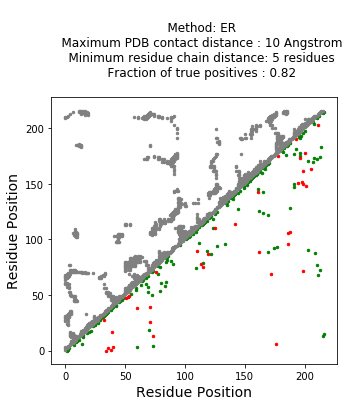

In [51]:
plt.figure(figsize=(5,5.75))
ax = plt.subplot2grid((1,1),(0,0))
ax = plot_contact_map_ecc(ax, 'ER', pairs_flat, ct_flat, dist_flat, ER_di_flat, 10, ld_val=5)
plt.tight_layout()


In [54]:
colors_hex = {"red": "#e41a1c", "blue": "#2258A5", "green": "#349C55", "purple": "#984ea3", "orange": "#FF8B00",
                      "yellow": "#ffff33", "grey": "#BBBBBB"}
colors_key = ["blue", "orange", "green"]
method2color = {"ER":"blue", "MF":"orange", "PLM":"green"}

 


def plot_true_positive_rates_ecc(method_visualizers, tps, methods, contact_dist, linear_dist, ax):
    """Plotes the true positive rate per rank of DCA ranked site pairs.
    The x-axis is in log scale.

    Parameters
    ----------
        self : DCAVisualizer

    Returns
    -------
        true_positive_rates_dict : dict
            A dictionary whose keys are true positives types (pdb, or dca)
            and whose values are the corresponding true positive rates per
            rank.

    """
    mv = method_visualizers[0]
    true_positive_rates_dict = mv.compute_true_positive_rates()
    pdb_tpr = true_positive_rates_dict['pdb']
    max_rank = len(pdb_tpr)
    pdb_ranks = [i + 1 for i in range(max_rank)]
    ax.plot(pdb_ranks, pdb_tpr,color='k')
    
    for i, tp in enumerate(tps):
        max_rank = len(tp)
        ranks = [j + 1 for j in range(max_rank)]
        tpr = [t/ranks[j] for j,t in enumerate(tp)]
        ax.plot(ranks, tpr, color=colors_hex[method2color[methods[i]]],label=methods[i])

        ax.set_xscale('log')
        ax_title = '''
        True Positive Rate Per Rank
        PDB cut-off distance : {} Angstrom
        Residue chain distance : {}
        '''
    ax.set_title(ax_title.format(
            contact_dist, linear_dist,
        )
    )
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('True Positives/rank', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.show()
    return ax


In [52]:
from pydca.contact_visualizer import contact_visualizer
ref_outfile = Path(processed_data_dir, '%s_ref.fa' % pfam_id)
print(er_tp[:10])

ct_flats = [ct_flat, PLM_ct_flat, MF_ct_flat]
dis = [ER_di, PLM_di, PMF_di]

methods = ['ER', 'PLM', 'MF']

print('er_flat contacts, ', ct_flat)
print('plm_flat contacts', PLM_ct_flat)
tps = []
for ct_f in ct_flats:
    tp = np.cumsum(ct_f, dtype=float)
    print(len(tp))
#     if tp[-1] !=0:
#         tp /= tp[-1]
    tps.append(tp)
print(ct_flat[:10])
plmdca_visualizer = contact_visualizer.DCAVisualizer('protein', pdb_chain, pdb_id,
    refseq_file = str(ref_outfile),
    sorted_dca_scores = PLM_di_data,
    linear_dist = 5,
    contact_dist = 10
)




[0.         0.00515464 0.01030928 0.01030928 0.01546392 0.01546392
 0.0257732  0.0257732  0.05670103 0.05670103]
er_flat contacts,  [1. 1. 1. ... 0. 0. 0.]
plm_flat contacts [0. 0. 1. ... 0. 0. 1.]
23436
23436
23436
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



	The reference sequence contains less number of residues compared to PDB chain sequence. 
	Make sure that you have provided correct input data.

	PDB sequence has got gaps at the middle when aligned with reference.
	Usually residues are missing at the beginning and end of the chain.


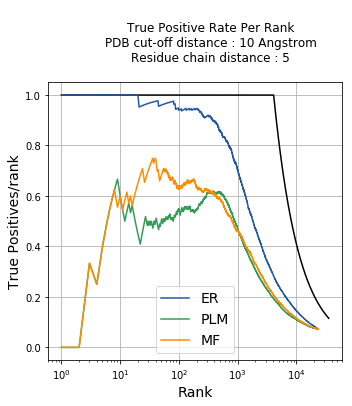

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(5,5.75))
ax = plt.subplot2grid((1,1),(0,0))
ax = plot_true_positive_rates_ecc([plmdca_visualizer], tps, methods, 10, 5, ax)
# ax = plot_true_positive_rates_ecc([plmdca_visualizer], dis, ct, methods, 5, 5, ax)

plt.tight_layout()


In [49]:
# This function should do the same thing as above but it calculates the flat contact 
# binary array using the contact distance and contact matrix.. ie no chance to have the wrong contact calculated
# above

def plot_true_positive_rates_ecc(method_visualizers, dis, ct, methods, contact_dist, linear_dist, ax):
    """Plotes the true positive rate per rank of DCA ranked site pairs.
    The x-axis is in log scale.

    Parameters
    ----------
        self : DCAVisualizer

    Returns
    -------
        true_positive_rates_dict : dict
            A dictionary whose keys are true positives types (pdb, or dca)
            and whose values are the corresponding true positive rates per
            rank.

    """
    mv = method_visualizers[0]
    true_positive_rates_dict = mv.compute_true_positive_rates()
    pdb_tpr = true_positive_rates_dict['pdb']
    max_rank = len(pdb_tpr)
    pdb_ranks = [i + 1 for i in range(max_rank)]
    ax.plot(pdb_ranks, pdb_tpr,color='k')
    
    # Set contact matrix with contact distance
    ct1 = ct.copy()
    ct_pos = ct < contact_dist
    
    for i, method_di in enumerate(dis):
        # Generate your TPR
        method_mask = np.triu(np.ones(method_di.shape[0], dtype=bool), k=1)
        method_order = method_di[method_mask].argsort()[::-1]
        method_ct_flat = ct1[method_mask][method_order]
        
        print(method_ct_flat)
        max_rank = len(method_ct_flat)
        ranks = [j + 1 for j in range(max_rank)]
        tpr = [t/ranks[jj] for jj,t in enumerate(method_ct_flat)]
        ax.plot(ranks, tpr, color=colors_hex[method2color[methods[i]]],label=methods[i])

        ax.set_xscale('log')
        ax_title = '''
        True Positive Rate Per Rank
        PDB cut-off distance : {} Angstrom
        Residue chain distance : {}
        '''
    ax.set_title(ax_title.format(
            contact_dist, linear_dist,
        )
    )
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('True Positives/Rank', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid()
    plt.tight_layout()
    plt.show()
    return ax